<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/UAS/07_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning dan Random Forest
Latihan sederhana untuk klasifikasi menggunakan Random Forest pada dataset Iris.

In [1]:
# Import Library
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Training Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
# Evaluasi Model
y_pred = rf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



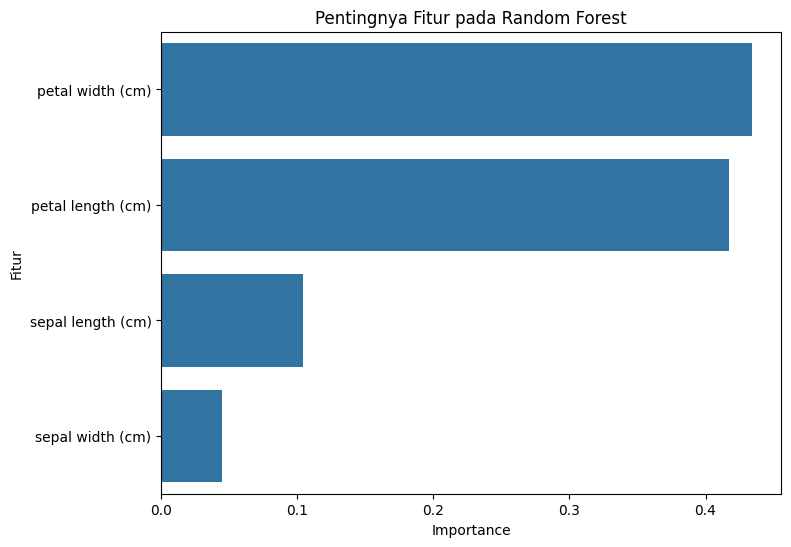

In [5]:
# Visualisasi Feature Importance
feature_importance = rf.feature_importances_
df_feat = pd.DataFrame({"Fitur": iris.feature_names, "Importance": feature_importance})
df_feat.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Fitur", data=df_feat)
plt.title("Pentingnya Fitur pada Random Forest")
plt.show()

## Catatan Teori dan Matematika Random Forest

**Random Forest** adalah metode *ensemble learning* yang menggunakan banyak pohon keputusan (decision tree) dan menggabungkan prediksinya.

**Langkah Matematis Utama:**
1. Untuk setiap pohon:
   - Ambil sampel acak dengan pengembalian dari dataset asli (bootstrap sampling)
   - Pada setiap node split, hanya subset acak dari fitur yang dipertimbangkan (bukan semua fitur)
2. Setiap pohon menghasilkan prediksi → hasil akhir adalah mayoritas voting (klasifikasi) atau rata-rata (regresi)

**Fungsi Akurasi (Accuracy):**
$$ \text{Akurasi} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Prediksi}} $$

**Keunggulan:**
- Mengurangi overfitting dibanding single decision tree
- Stabil dan akurat untuk berbagai jenis data

**Kekurangan:**
- Lebih kompleks dan membutuhkan lebih banyak memori/komputasi
- Interpretasi model lebih sulit dibandingkan pohon tunggal